In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the dataset
df = pd.read_csv("combined_fall_data.csv")

# Display basic info
print("Dataset shape:", df.shape)
print(df.info())
print("\nClass Distribution:")
print(df['Label'].value_counts())

# Display first few rows
print("\nPreview of data:")
print(df.head())

# Summary statistics
print("\nStatistical Summary:")
print(df.describe())

Dataset shape: (3980, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gx (°/s)  3980 non-null   float64
 1   Gy (°/s)  3980 non-null   float64
 2   Gz (°/s)  3980 non-null   float64
 3   Ax (g)    3980 non-null   float64
 4   Ay (g)    3980 non-null   float64
 5   Az (g)    3980 non-null   float64
 6   Label     3980 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 217.8 KB
None

Class Distribution:
0    2000
1    1980
Name: Label, dtype: int64

Preview of data:
     Gx (°/s)    Gy (°/s)    Gz (°/s)    Ax (g)    Ay (g)    Az (g)  Label
0    0.120296    0.811397    0.540909  0.014981 -0.000167  1.003100      0
1   60.748708  123.754902  198.003044  0.087748 -0.662810  0.711886      1
2   -0.524520   -0.329448    1.471035  0.107214 -0.084982  0.976407      0
3    2.971671  -18.960019   -4.884461  0.128821 -0.067736 -0.074696      1
4

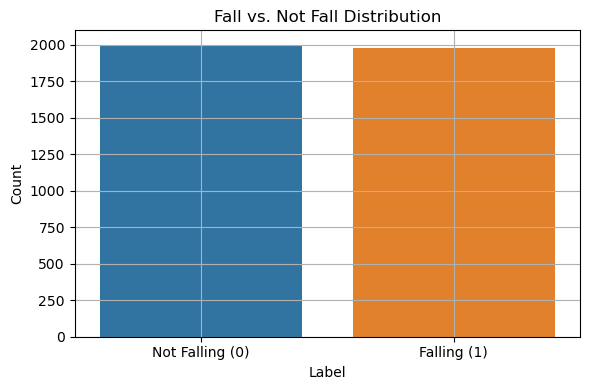

In [13]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Label')
plt.title("Fall vs. Not Fall Distribution")
plt.xticks([0, 1], ['Not Falling (0)', 'Falling (1)'])
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

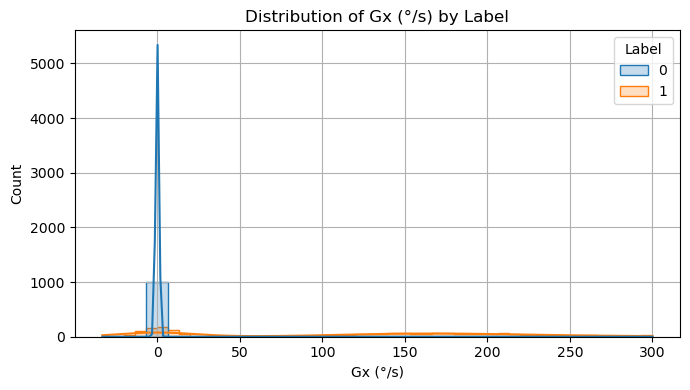

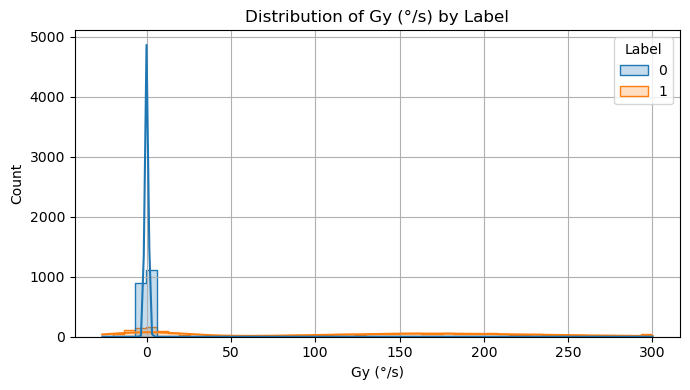

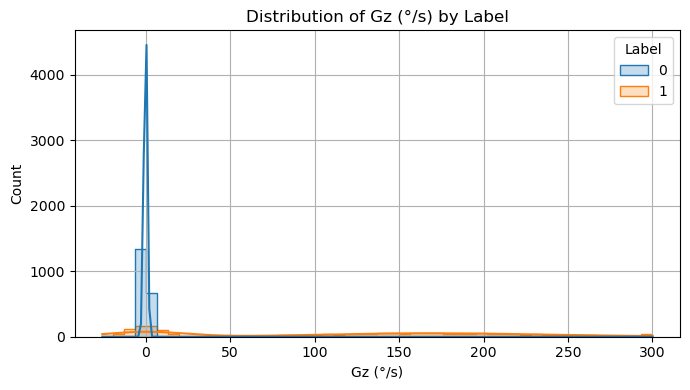

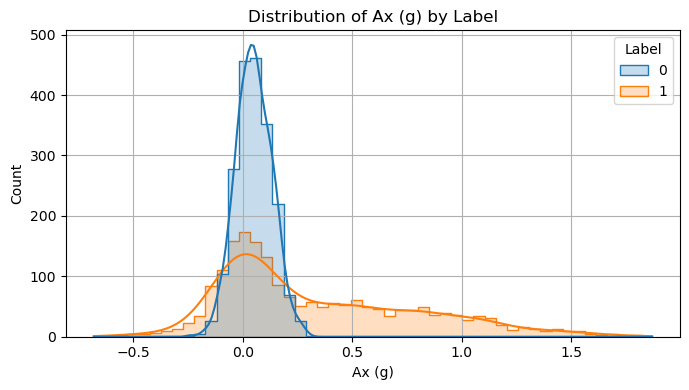

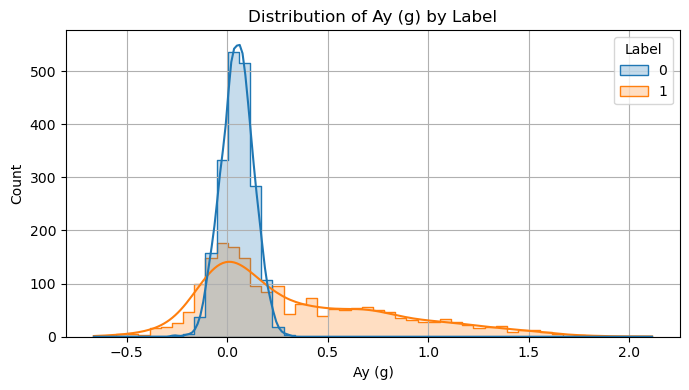

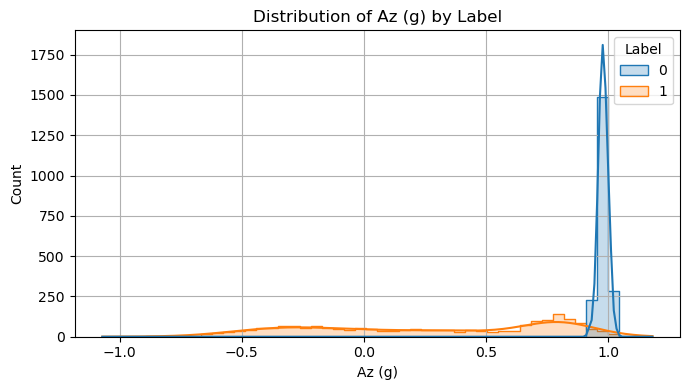

In [14]:
# Visualize sensor distribution by label
sensor_cols = ['Gx (°/s)', 'Gy (°/s)', 'Gz (°/s)', 'Ax (g)', 'Ay (g)', 'Az (g)']

for col in sensor_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=col, hue='Label', bins=50, kde=True, element="step")
    plt.title(f"Distribution of {col} by Label")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


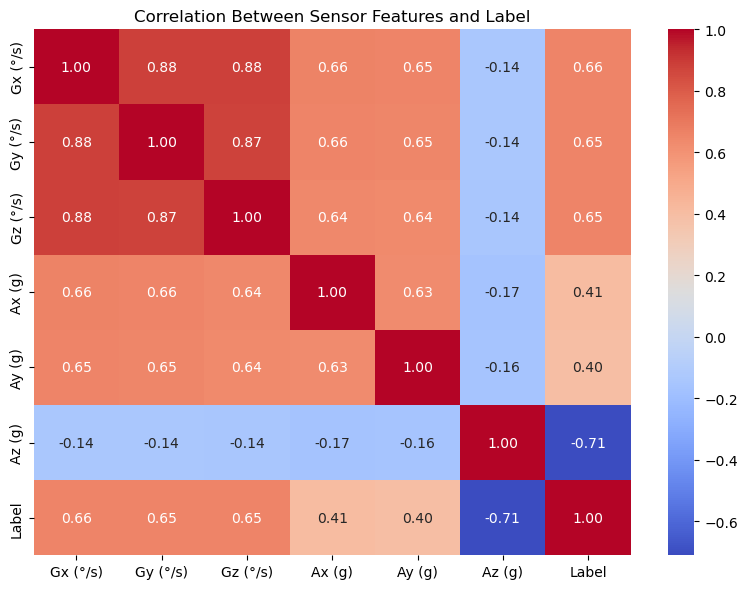

In [15]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Sensor Features and Label")
plt.tight_layout()
plt.show()

In [ ]:
# Split the data into Train-Test data
from sklearn.model_selection import train_test_split

# Separate features and label
X = df.drop("Label", axis=1)
y = df["Label"]

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training samples:", len(y_train))
print("Testing samples:", len(y_test))
print("Label distribution in training:\n", y_train.value_counts())

Training samples: 2786
Testing samples: 1194
Label distribution in training:
 0    1400
1    1386
Name: Label, dtype: int64


In [ ]:
# Train the Random Forest Data
from sklearn.ensemble import RandomForestClassifier

# Create and train model with balanced class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       600
           1     1.0000    1.0000    1.0000       594

    accuracy                         1.0000      1194
   macro avg     1.0000    1.0000    1.0000      1194
weighted avg     1.0000    1.0000    1.0000      1194



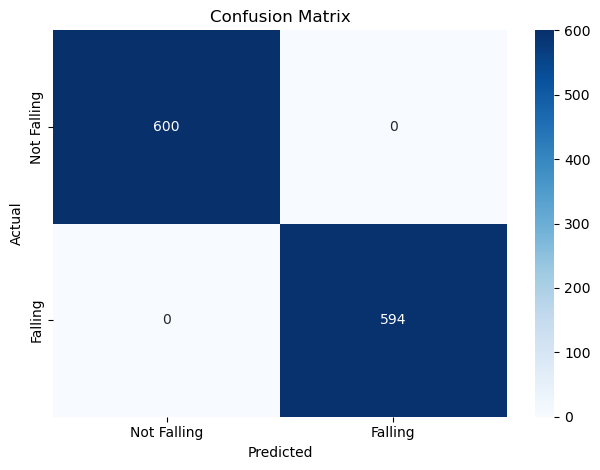

In [ ]:
# Test the data
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Falling", "Falling"], yticklabels=["Not Falling", "Falling"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [ ]:
# Save the model
import joblib

# Assume your trained model is named 'rf_model'
# Save it to a .pkl file
joblib.dump(model, "fall_detection_model.pkl")

print("Model saved as fall_detection_rf_model.pkl")

Model saved as fall_detection_rf_model.pkl
